<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Unit8_%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%97%E0%B8%B3_Regularization_%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%AA%E0%B8%A1%E0%B8%B1%E0%B8%A2%E0%B9%83%E0%B8%AB%E0%B8%A1%E0%B9%88_%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B9%80%E0%B8%97%E0%B8%84%E0%B8%99%E0%B8%B4%E0%B8%84_Augmentation%2C_Batch_Normalization_%E0%B9%81%E0%B8%A5%E0%B8%B0_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ในการเพิ่มประสิทธิภาพ Machine Learning Model มีวิธีการหลัก 2 อย่าง ที่ต้องให้ความสำคัญ คือ 1) การลด Generalization Error ด้วย Regularization และ 2) การลด Cost Value ด้วย Optimization หรือการหาค่าที่เหมาะสมที่สุด

ซึ่งหน้าที่ของ Regularization คือ การปรับแต่งให้ Model มีประสิทธิภาพในการทำนายที่ดี ลด Error จากข้อมูลที่มันไม่เคยเห็นมาก่อน ด้วยการเรียนรู้จาก Training Dataset

ดังนั้นจึงกล่าวอีกอย่างหนึ่งว่า Regularization คือ วิธีที่ใช้เพื่อแก้ปัญหา Underfitting หรือ Overfitting ของ Machine Learning Model ก็ได้

เราสามารถจัดการกับปัญหา Underfitting ของ Neural Network Model ได้โดยการเพิ่มขีดความสามารถ (Capacity) ด้วยการเพิ่มจำนวน Layer และจำนวน Node ใน Layer ให้มากขึ้น แต่ก็อาจทำให้เกิดปัญหา Overfitting ตามมา

ปัญหา Overfitting สามารถวินิจฉัยได้ง่ายโดยการตรวจสอบประสิทธิภาพการเรียนรู้ของ Model จาก Learning Curve ซึ่งผู้อ่านสามารถกลับไปทำความเข้าใจรูปแบบของ Learning Curve แบบต่างๆ ได้จากบทความเรื่อง การวิเคราะห์ประสิทธิภาพ Machine Learning Model ด้วย Learning Curve)

การแก้ปัญหา Overfitting อาจใช้เทคนิคอย่างเช่น การทำ Augmentation, Batch Normalization, Dropout, L1/L2 Regularization, Weight Decay, Weight Constraints และ Early Stopping ฯลฯ

บทความนี้เราจะทดลองแก้ปัญหา Overfitting ของ Neural Network แบบ Classification Model ที่มีการ Train ด้วย Fashion-MNIST Dataset โดยยกตัวอย่างเทคนิคที่เป็นที่นิยมในปัจจุบัน 3 เทคนิค ได้แก่ การทำ Augmentation, Batch Normalization และ Dropout ซึ่งในที่สุดแล้วจะทำให้สามารถเพิ่มประสิทธิภาพของ Model ได้มากน้อยเท่าไหร่ ท่านสามารถติดตามอ่านกันได้ครับ

#Fashion-MNIST Dataset

Fashion-MNIST เป็น Dataset ที่เป็นภาพเสื้อผ้า กระเป๋า และรองเท้า ขนาด 28x28 Pixel แบบ Grayscale แบ่งเป็นข้อมูล Train 60,000 ภาพ และข้อมูล Test อีก 10,000 ภาพ รวมทั้งหมด 10 ประเภท โดยมีการกำหนด Label ตั้งแต่ 0-9 ดังนี้

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

ซึ่งเราจะต้องมีการ Load Dataset แล้วขยายมิติของ Dataset ทำ Scaling ข้อมูล ระหว่าง 0-1 เข้ารหัสผลเฉลยแบบ One-hot Encoding และ Split Dataset สำหรับการ Train และ Validation ดังต่อไปนี้

Import Library และกำหนดค่า Parameter ที่จำเป็น

In [ ]:
import tensorflow as tf
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
fashion_mnist = tf.keras.datasets.fashion_mnist
load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly import subplots
import plotly

import warnings
warnings.filterwarnings('ignore')

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
VAL_SIZE = 0.2
RANDOM_STATE =    99
BATCH_SIZE = 256

ljkLoad Dataset

In [ ]:
(train_data, y), (test_data, y_test) = fashion_mnist.load_data()

print("Fashion MNIST train -  rows:",train_data.shape[0],"columns:", train_data.shape[1], " rows:", train_data.shape[2])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1], " rows:", train_data.shape[2])

4422102/4422102 [==============================] - 0s 0us/step
Fashion MNIST train -  rows: 60000 columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28


In [ ]:
y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Fashion MNIST train -  rows: 60000  columns: 28  rows: 28
Fashion MNIST test -  rows: 10000  columns: 28  rows: 28

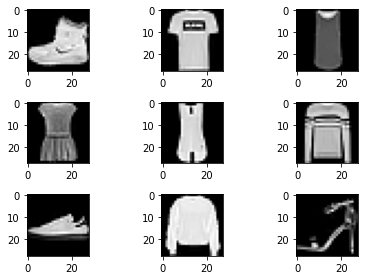

In [ ]:
for i in range(9):
    plt.subplot(330 + 1 + i)    
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.tight_layout()
plt.savefig('fashion_mnist.jpeg', dpi=300)

ขยายมิติของ Dataset

In [ ]:
print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


ทำ Scaling

In [ ]:
train_data = train_data / 255.0
test_data = test_data / 255.0

เข้ารหัสผลเฉลยแบบ One-hot Encoding

In [ ]:
print(y.shape, y_test.shape)
print(y[:10])

(60000,) (10000,)
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

แบ่งข้อมูลสำหรับ Train และ Validate โดยการสุ่มในสัดส่วน 80:20

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y, test_size=VAL_SIZE, random_state=RANDOM_STATE)

x_train.shape, x_val.shape, y_train.shape, y_val.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Baseline Model

นิยาม Model, Compile Model และ Train Model โดยยังไม่ใช้เทคนิค Regularization ดังต่อไปนี้

นิยาม Model

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile Model

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

Train Model

In [ ]:
NO_EPOCHS = 10

history = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 20s 19ms/step - loss: 0.5527 - accuracy: 0.8008 - val_loss: 0.3743 - val_accuracy: 0.8661
Epoch 2/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3167 - accuracy: 0.8855 - val_loss: 0.3112 - val_accuracy: 0.8851
Epoch 3/10
188/188 [==============================] - 3s 16ms/step - loss: 0.2588 - accuracy: 0.9065 - val_loss: 0.2580 - val_accuracy: 0.9062
Epoch 4/10
188/188 [==============================] - 3s 17ms/step - loss: 0.2242 - accuracy: 0.9194 - val_loss: 0.2488 - val_accuracy: 0.9083
Epoch 5/10
188/188 [==============================] - 3s 16ms/step - loss: 0.1970 - accuracy: 0.9280 - val_loss: 0.2364 - val_accuracy: 0.9167
Epoch 6/10
188/188 [==============================] - 3s 17ms/step - loss: 0.1733 - accuracy: 0.9367 - val_loss: 0.2336 - val_accuracy: 0.9150
Epoch 7/10
188/188 [==============================] - 3s 17ms/step - loss: 0.1532 - accuracy: 0.9439 - val_loss: 0.2189 - val_accuracy: 0.922

Evaluation

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    plotly.offline.iplot(fig, filename='accuracy-loss')

In [ ]:
plot_accuracy_and_loss(history)

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.23796306550502777
Test Accuracy: 0.9230999946594238


จากกราฟ Loss ด้านบน พบว่า Model มีปัญหา Overfitting ตั้งแต่รอบที่ 7 โดยเมื่อวัดประสิทธิภาพการ Predict ด้วย Test Dataset ได้ค่า Accuracy 91.52%

# Image Augmentation

ปัญหา Overfitting ของ Model สามารถแก้ได้ด้วยการเพิ่มจำนวน Data ในการ Train แต่ด้วย Dataset ของเรามีจำกัด ดังนั้นในบางกรณีเราจึงต้องสังเคราะห์ Data ขึ้นมาเอง ในกรณีของ Data แบบ Image เราสามารถใช้เทคนิคอย่างเช่นการหมุนภาพ การเลื่อนภาพ และการกลับภาพ ฯลฯ ซึ่งนอกจากเป็นการขยายจำนวน Data แล้ว Image Augmentation ยังช่วยเพิ่มความหลากหลายของภาพที่จะนำไป Train อีกด้วย

โดยผมจะขอยกตัวอย่างการทำ Image Augmentation ในแบบต่างๆ ได้แก่

Vertical Shift
Horizontal Shift
Shear
Zoom
Vertical Flip
Horizontal Flip
Rotate
Fill Mode
8.1 Constant Values
8.2 Nearest Neighbor
8.3 Reflect Values
แต่ก่อนอื่นเราจะอ่านไฟล์ภาพน้องเหมียวตังค์ฟูล มาทดลองทำ Image Augmentation ตามขั้นตอน ดังนี้

อ่านไฟล์ภาพน้องตังค์ฟูล และ Plot ภาพน้อง

In [ ]:
import gdown

!gdown https://drive.google.com/drive/folders/1ZitQH-6FS6nG30BS3sDJMlD3iddUY-sY --folder

Retrieving folder list
Processing file 1DCO2KfpV8IEzIWsNfOiPogGsudfp_k1n cat1.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DCO2KfpV8IEzIWsNfOiPogGsudfp_k1n
To: /content/cat/cat1.jpg
100% 73.6k/73.6k [00:00<00:00, 66.0MB/s]
Download completed


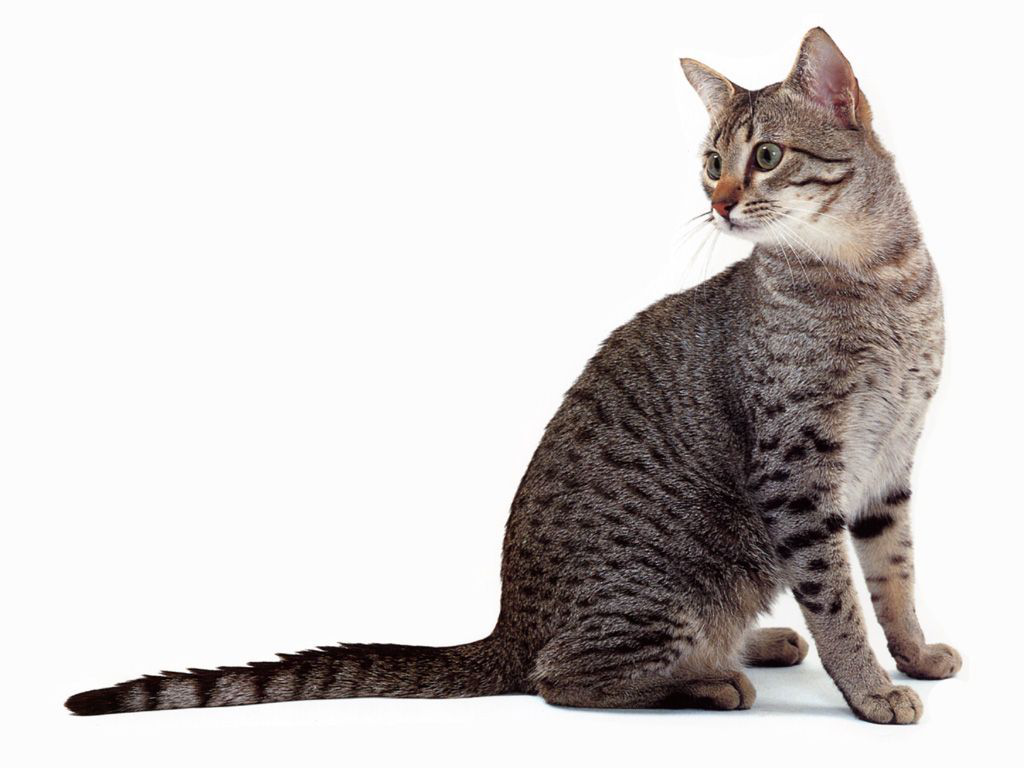

In [ ]:
cat = load_img('/content/cat/cat1.jpg')
cat

ขยายมิติของภาพจาก 3 มิติเป็น 4 มิติ เพื่อเตรียมนำเข้า Function ทำ Image Augmentation

In [ ]:
cat = img_to_array(cat)
print(cat.shape)
cat = cat.reshape(1,cat.shape[0],cat.shape[1],cat.shape[2])
print(cat.shape)

(768, 1024, 3)
(1, 768, 1024, 3)


ทดลองทำ Vertical Shift ด้วยการเลื่อนภาพขึ้นลงแบบสุ่มไม่เกิน 20%

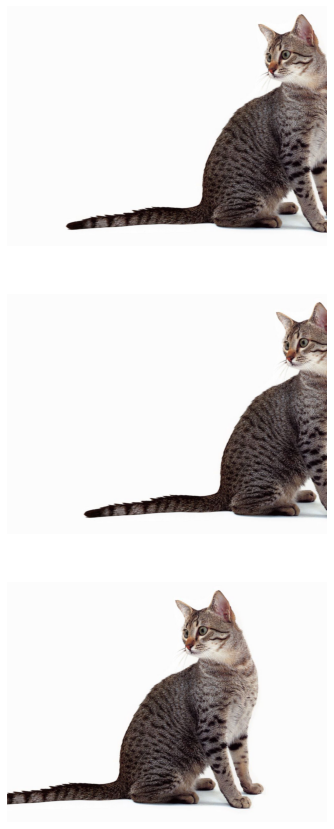

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.3)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat1.jpeg', dpi=300)

ทดลองทำ Horizontal Shift ด้วยการเลื่อนภาพซ้ายขวาแบบสุ่มไม่เกิน 20%

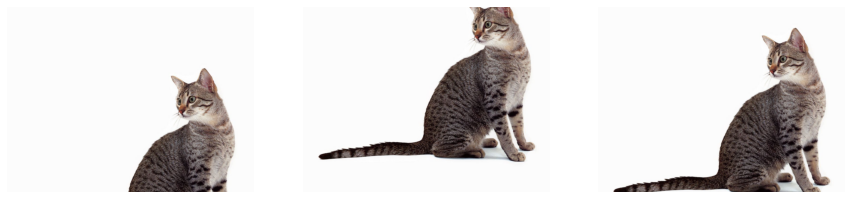

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.3)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat2.jpeg', dpi=300)

ทดลองบิดภาพ (Shear) แบบสุ่มไม่เกิน 20 องศา

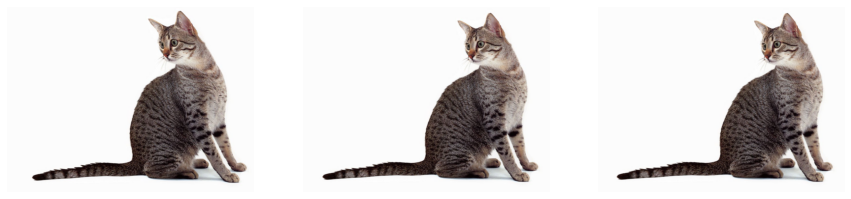

In [ ]:
datagen = ImageDataGenerator(shear_range=20)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat3.jpeg', dpi=300)

ทดลองขยายภาพ (Zoom) แบบสุ่มไม่เกิน 30%

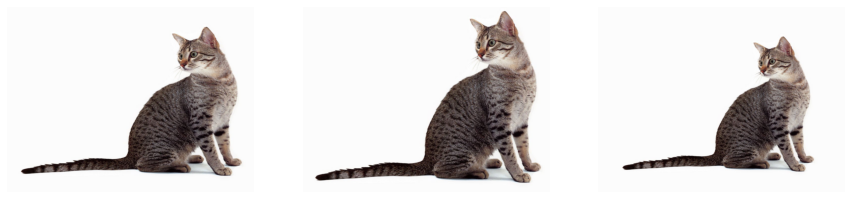

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.3)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat4.jpeg', dpi=300)

ทดลองพลิกภาพแนวตั้ง (Vertical Flip) แบบสุ่ม

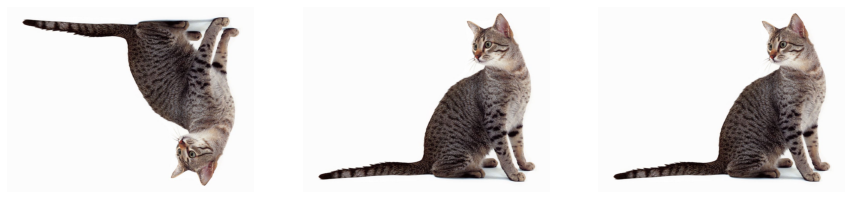

In [ ]:
datagen = ImageDataGenerator(vertical_flip=True)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat5.jpeg', dpi=300)

ทดลองพลิกภาพแนวนอน (Horizontal Flip) แบบสุ่ม

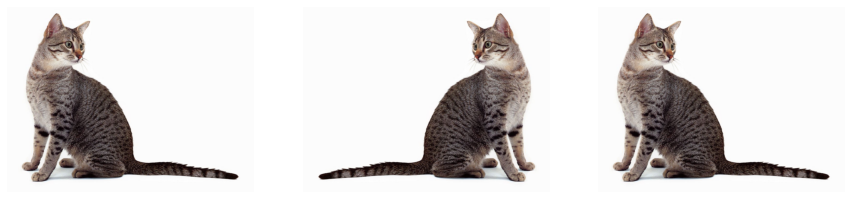

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat6.jpeg', dpi=300)

ทดลองหมุนภาพ (Rotate) ไม่เกิน 30 องศา แบบสุ่ม

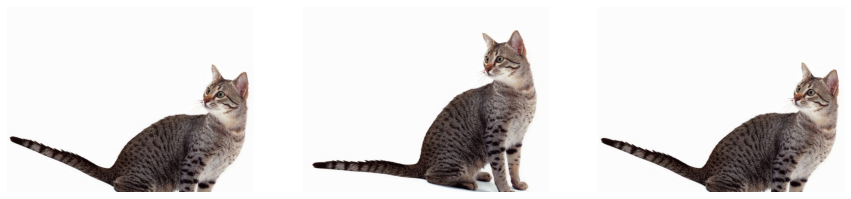

In [ ]:
datagen = ImageDataGenerator(rotation_range=30)

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat7.jpeg', dpi=300)

# Fill Mode
โดย Default เมื่อมีการเลื่อนภาพ บิดภาพ หมุนภาพ จะเกิดพื้นที่ว่างที่มุม ซึ่งจะมีการเติมภาพให้เต็มโดยใช้เทคนิคแบบ Nearest Neighbor ซึ่งเป็นการดึงสีบริเวณใกล้เคียงมาระบาย แต่เราก็ยังสามารถกำหนดวิธีการเติมสีลงในภาพ (Fill) ด้วยเทคนิคอื่นได้จาก Parameter fill_mode ดังต่อไปนี้

เติมสีดำ (Constant Values)

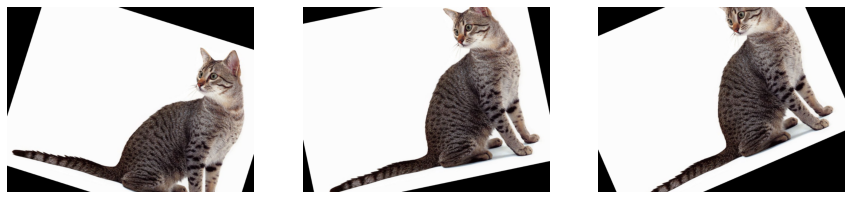

In [ ]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'constant')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat8.jpeg', dpi=300)

เติมสีข้างเคียง (Nearest Neighbor)

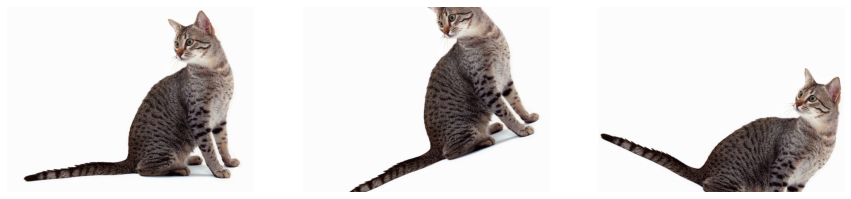

In [ ]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'nearest')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat9.jpeg', dpi=300)

เติมสีแบบกระจกสะท้อน (Reflect Values)

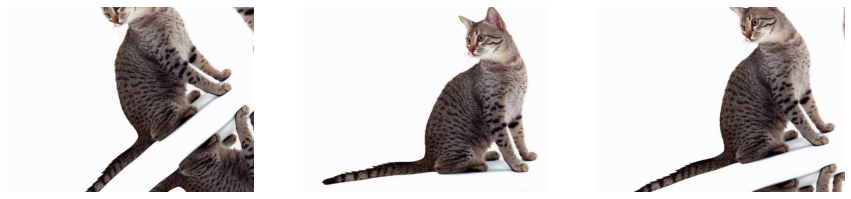

In [ ]:
datagen = ImageDataGenerator(rotation_range=50, fill_mode = 'reflect')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat10.jpeg', dpi=300)

เติมสีจากภาพแบบต่อกัน (Wrap Values)

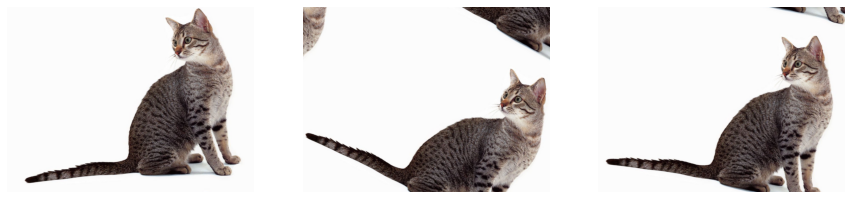

In [ ]:
datagen = ImageDataGenerator(rotation_range=30, fill_mode = 'wrap')

aug_iter = datagen.flow(cat, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
fig.savefig('cat11.jpeg', dpi=300)

เราจะเพิ่มความหลากหลายของภาพเพื่อแก้ปัญหา Overfitting ตามขั้นตอนดังนี้

นิยามวิธีการทำ Image Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

ทดลองดึงภาพมา Plot 9 ภาพ

In [ ]:
x_batch = datagen.flow(x_train, y_train, batch_size=9).next()
x_batch[0].shape

(9, 28, 28, 1)

ลดมิติภาพ

In [ ]:
x_batch = x_batch[0].reshape((x_batch[0].shape[0], 28, 28))
x_batch.shape

(9, 28, 28)

Plot ภาพ Fashion-MNIST ที่มีการทำ Augmentation แล้ว

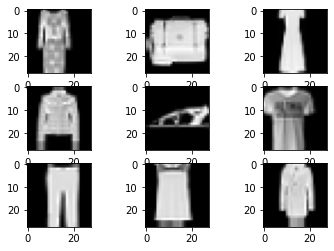

In [ ]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_batch[i], cmap=plt.get_cmap('gray'))
    
plt.savefig('fashion_mnist2.jpeg', dpi=300)

นิยาม Model

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile Model

In [ ]:

optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation_10 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_11 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                      

Train Model

In [ ]:
NO_EPOCHS = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/20
187/187 [==============================] - 23s 110ms/step - loss: 0.7556 - accuracy: 0.7188 - val_loss: 0.4692 - val_accuracy: 0.8266
Epoch 2/20
187/187 [==============================] - 17s 90ms/step - loss: 0.4863 - accuracy: 0.8176 - val_loss: 0.4252 - val_accuracy: 0.8364
Epoch 3/20
187/187 [==============================] - 18s 94ms/step - loss: 0.4214 - accuracy: 0.8434 - val_loss: 0.3207 - val_accuracy: 0.8823
Epoch 4/20
187/187 [==============================] - 17s 91ms/step - loss: 0.3840 - accuracy: 0.8551 - val_loss: 0.2931 - val_accuracy: 0.8883
Epoch 5/20
187/187 [==============================] - 17s 91ms/step - loss: 0.3488 - accuracy: 0.8706 - val_loss: 0.2832 - val_accuracy: 0.8921
Epoch 6/20
187/187 [==============================] - 17s 90ms/step - loss: 0.3281 - accuracy: 0.8770 - val_loss: 0.2660 - val_accuracy: 0.9007
Epoch 7/20
187/187 [==============================] - 18s 99ms/step - loss: 0.3082 - accuracy: 0.8855 - val_loss: 0.2512 - val_accuracy

Plot กราฟ

In [ ]:
plot_accuracy_and_loss(history)

วัดค่า Accuracy จาก Test Dataset

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.23074384033679962
Test Accuracy: 0.9171000123023987


จากกราฟ Loss ด้านบน เมื่อมีการ Train ทั้งหมด 20 Epoch พบว่า Validation Loss ไม่พุ่งขึ้นในรอบแรกๆ เหมือนในการ Train แบบไม่ใช้เทคนิค Image Augmentation โดยเมื่อวัดประสิทธิภาพการ Predict ด้วย Test Dataset ได้ค่า Accuracy 92.64% อย่างไรก็ตาม ใน Epoch ท้ายๆ Validation Loss ก็ยังมีแนวโน้มที่จะยกสูงขึ้นจนเกิดปัญหา Overfitting ครับ

#Batch Normalization
Batch Normalization เป็นเทคนิคในการทำ Scaling Data หรือเรียกอีกอย่างหนึ่งว่าการทำ Normalization เพื่อปรับค่าข้อมูลให้อยู่ในขอบเขตที่กำหนด ก่อนส่งออกจาก Node ใน Neural Network Layer เป็น Input ของ Layer ถัดไป ซึ่งเดิมเราจะทำ Normalization ในขั้นตอน Feature Engineering เช่น Normalize ด้วยการแปลงค่าสีของภาพแบบ Grayscale จาก 0-255 เป็น 0-1 โดยนำค่าสีเดิมหารด้วย 255 ฯลฯ

นอกจากนี้การทำ Data Normalization กับ Feature อย่างเช่น อายุ และเงินเดือน จะทำให้ทั้ง 2 Feature มีน้ำหนักเท่ากัน มีการกระจายตัวเหมือนกัน ไม่มีตัวหนึ่งตัวใดมีอิทธิพลมากกว่ากัน ทั้งยังเป็นการเพิ่มความเร็วในการ Train Model และทำให้ค่า Loss ลดลงเมื่อเทียบกันตอนที่ยังไม่ได้ทำ Normalization เพราะมีค่าข้อมูลที่เล็กกว่า

ในการทำ Data Normalization เราสามารถเลือกวิธีการได้หลายวิธี เช่น การทำ Min-Max Normalization หรือการทำ Standardization เป็นต้น

Min-Max Normalization = 𝑥′ = [𝑥–min(𝑥)]/[max(𝑥) - min(𝑥)]

Standardization = 𝑥′ = (𝑥–𝑥¯)/𝜎2

โดยที่ 𝑥¯ คือ Mean และ 𝜎2 คือ Variance

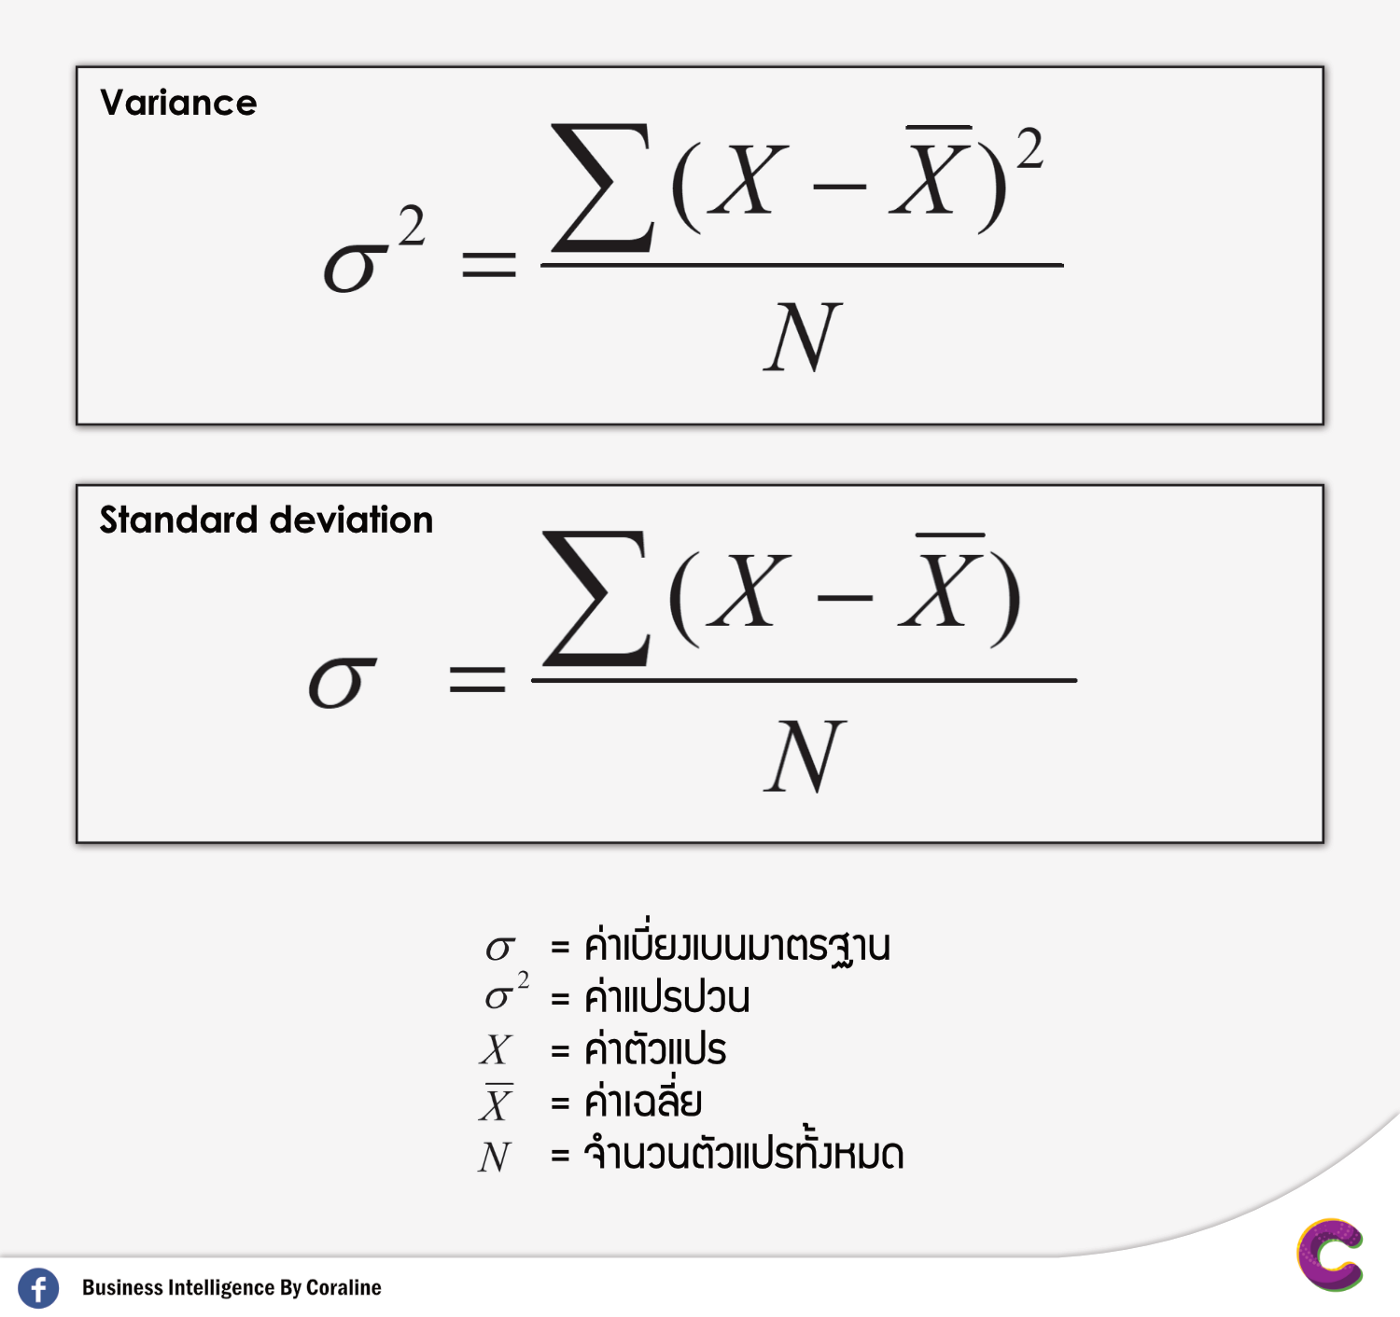

7e36ca07fa53
Batch Normalization จะใช้วิธีการแบบ Standardization ซึ่งจะมีการกำหนดค่า Mean และ Variance โดยการเรียนรู้จาก Batch ขนาดเล็ก ที่หยิบมาสอน Model ด้วย Layer พิเศษใน Neural Network เอง

เราจะทดลองใช้ Batch Normalization ร่วมกับเทคนิค Image Augmentation เพื่อแก้ปัญหา Overfitting ตามขั้นตอนดังต่อไปนี้

นิยามวิธีการทำ Image Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range = 0.2,       #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05
)

datagen.fit(x_train)

นิยาม Model

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

*Batch Normalization เหมาะสำหรับการวางไว้หลัง Activate Function ที่มีรูปร่างแบบ S-shapes เช่น Hyperbolic Tangent และ Sigmoid Activation Function

**หรือวางไว้หน้า Activate Function ที่ให้ผลลัพธ์แบบ Non-Gaussian Distributions เช่น Rectified Linear (ReLU) Activation Function

Compile Model

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation_15 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)       

จากภาพจะเห็นว่าใน Batch Normalization Layer จะมี Parameter สำหรับกำหนดค่า Mean และ Variance โดยการเรียนรู้จาก Batch ขนาดเล็กที่หยิบมาสอน Model

Train Model

In [ ]:
NO_EPOCHS = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose=1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/20
187/187 [==============================] - 22s 114ms/step - loss: 0.1537 - accuracy: 0.9423 - val_loss: 0.2434 - val_accuracy: 0.9148
Epoch 2/20
187/187 [==============================] - 17s 92ms/step - loss: 0.1546 - accuracy: 0.9419 - val_loss: 0.2182 - val_accuracy: 0.9230
Epoch 3/20
187/187 [==============================] - 18s 94ms/step - loss: 0.1482 - accuracy: 0.9442 - val_loss: 0.2463 - val_accuracy: 0.9151
Epoch 4/20
187/187 [==============================] - 18s 98ms/step - loss: 0.1447 - accuracy: 0.9459 - val_loss: 0.2139 - val_accuracy: 0.9261
Epoch 5/20
187/187 [==============================] - 18s 95ms/step - loss: 0.1413 - accuracy: 0.9477 - val_loss: 0.2243 - val_accuracy: 0.9251
Epoch 6/20
187/187 [==============================] - 18s 96ms/step - loss: 0.1404 - accuracy: 0.9483 - val_loss: 0.3037 - val_accuracy: 0.9013
Epoch 7/20
187/187 [==============================] - 17s 93ms/step - loss: 0.1372 - accuracy: 0.9498 - val_loss: 0.2311 - val_accuracy

Plot กราฟ

In [ ]:
plot_accuracy_and_loss(history)

วัดค่า Accuracy จาก Test Dataset

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.222601518034935
Test Accuracy: 0.9311000108718872


จากกราฟ Loss พบว่า Training Loss มีแนวโน้มที่จะลดลง แต่ Validation Loss ค่อนข้างแกว่ง จึงอาจต้องใช้เทคนิคอื่นร่วมแก้ปัญหา Overfitting ซึ่งเทคนิคหนึ่งที่มักนำมาใช้งานร่วมกับ Batch Normalization คือ Dropout ครับ

# Dropout
Dropout เป็นเทคนิคในการทำ Regularization ที่เรียบง่าย แต่มีประสิทธิภาพอย่างมาก โดยเมื่อมีการใช้งาน Dropout ภายใน Layer ที่กำหนดแล้ว Node ใน Layer นั้นจะถูกสุ่มเพื่อปิดการทำงานชั่วคราวในแต่ละรอบของการทำ Forward Propagation และ Back-propagation ตามอัตราที่กำหนด ในขณะที่มีการ Train Model ทำให้ไม่มีการ Update Weight ใดๆ ที่ถูกเชื่อมต่อกับ Neuron Node ที่กำลังถูกปิด

เราอาจมอง Dropout เหมือนกับการทำงานของบริษัทหนึ่งที่มีพนักงาน 100 คน ครับ

ในกรณีที่ไม่มีการใช้ Dropout เปรียบได้กับการที่บริษัทมีนโยบายไม่อนุญาตให้พนักงานคนใดเลยลาหยุดงาน ทำให้แต่ละคนต้องรับผิดชอบงานของตัวเองจนมีความเชี่ยวชาญเฉพาะด้าน สามารถแก้ปัญหาแบบเดิมๆ ที่เคยเรียนรู้มาแล้วเป็นอย่างดี แต่เมื่อเจอปัญหาใหม่ๆ พวกเขาจะไม่สามารถประยุกต์ใช้ความรู้และทักษะความชำนาญเดิมมาแก้ปัญหาได้อย่างมีประสิทธิภาพ

ในกรณีที่มีการใช้ Dropout เปรียบได้กับการที่บริษัทมีนโยบายอนุญาตให้พนักงานสามารถลาหยุดงาน ด้วยการสุ่มในอัตราที่กำหนด เช่น วันละ 1 คน โดยคนที่ยังคงปฏิบัติงานต้องสลับกันมารับผิดชอบในหน้าที่ของพนักงานที่ได้หยุดพัก จนทำให้ทุกคนสามารถทำงานต่างๆ ทดแทนกันได้อย่างดี โดยไม่มีพนักงานคนใดมีอิทธิพลเหนือคนอื่น เมื่อเจอปัญหาใหม่ๆ พวกเขาจะสามารถประยุกต์ใช้ความรู้และทักษะความชำนาญมาแก้ปัญหาได้อย่างมีประสิทธิภาพ

อย่างไรก็ตาม ในการใช้งานจริง เราควรนำ Dropout มาใช้กับ Model ที่มี Capacity สูงมากพอ เช่นเดียวกับที่ควรนำไปใช้กับบริษัทที่มีพนักงานจำนวนมากๆ โดยมีอัตราการ Dropout ในช่วงระหว่าง 0.2 - 0.5

เราจะทดลองใช้เทคนิค Dropout ร่วมกับ Batch Normalization และ Image Augmentation เพื่อแก้ปัญหา Overfitting ตามขั้นตอนดังต่อไปนี้

นิยามวิธีการทำ Image Augmentation

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=0.05,    #Randomly rotate images in the range
        zoom_range=0.2,         #Randomly zoom image
        width_shift_range=0.1,  #Randomly shift images horizontally
        height_shift_range=0.1, #Randomly shift images vertically
        shear_range=0.05        #Randomly shear images
)

datagen.fit(x_train)

นิยาม Model

In [ ]:
# model = Sequential()
model = tf.keras.Sequential()

#1. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#2. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

#3. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.3))

#4. CNN LAYER
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))


#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.30))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Compile Model

In [ ]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_20 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

Train Model

In [ ]:
NO_EPOCHS = 20

history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                              shuffle=True,
                              epochs=NO_EPOCHS, validation_data = (x_val, y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // BATCH_SIZE)

Epoch 1/20
187/187 [==============================] - 18s 96ms/step - loss: 0.2580 - accuracy: 0.9043 - val_loss: 0.2108 - val_accuracy: 0.9224
Epoch 2/20
187/187 [==============================] - 18s 97ms/step - loss: 0.2610 - accuracy: 0.9032 - val_loss: 0.1999 - val_accuracy: 0.9278
Epoch 3/20
187/187 [==============================] - 18s 96ms/step - loss: 0.2568 - accuracy: 0.9031 - val_loss: 0.2114 - val_accuracy: 0.9227
Epoch 4/20
187/187 [==============================] - 19s 101ms/step - loss: 0.2583 - accuracy: 0.9041 - val_loss: 0.2149 - val_accuracy: 0.9195
Epoch 5/20
187/187 [==============================] - 18s 96ms/step - loss: 0.2520 - accuracy: 0.9086 - val_loss: 0.2227 - val_accuracy: 0.9143
Epoch 6/20
187/187 [==============================] - 19s 104ms/step - loss: 0.2500 - accuracy: 0.9075 - val_loss: 0.2029 - val_accuracy: 0.9250
Epoch 7/20
187/187 [==============================] - 18s 94ms/step - loss: 0.2501 - accuracy: 0.9084 - val_loss: 0.2036 - val_accurac

Plot กราฟ

In [ ]:
plot_accuracy_and_loss(history)

วัดค่า Accuracy จาก Test Dataset

In [ ]:
score = model.evaluate(test_data, y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.20796620845794678
Test Accuracy: 0.9225999712944031


จากกราฟ Loss ด้านบน เมื่อมีการ Train ทั้งหมด 200 Epoch โดยใช้เทคนิค  Augmentation, Batch Normalization และ Dropout พบว่า Validation Loss ไม่พุ่งขึ้นจนเกิดปัญหา Overfitting เหมือนกับในการ Train แบบไม่ใช้ Dropout เมื่อวัดประสิทธิภาพการ Predict ด้วย Test Dataset ได้ค่า Accuracy 92.63%